# Nhóm 8

Giới thiệu nhóm:<br>

| STT | Họ và Tên                     | Nhiệm vụ                 |
| ----|-------------------------------|--------------------------|
| 1   | Nguyễn Thành Công (Nhóm trưởng) | Code (chính) lấy dữ liệu, xử lý dữ liệu, trình bày kiến thức kinh tế, Shape ratio |
| 2   | Nguyễn Thị Là                   | Code giải pháp, monte carlo |
| 3   | Lưu Thị Thu Hiền                | Code biểu đồ, các phép tính ma trận; Thực hiện trình bày |

**Yêu cầu cài đặt thư viện:** <br>
Thư viện Vnquant hữu ích trong việc crawl dữ liệu chứng khoán và vẽ biểu đồ nến OHLC
- Cài đặt thư viện Vnquant <br>
git clone https://github.com/phamdinhkhanh/vnquant <br>
cd vnquant <br>
python setup.py install <br>
- Cài đặt thư viện BeautifulSoup4 theo yêu cầu của Vnquant<br>
pip install beautifulsoup4

In [1]:
from vnquant import DataLoader
from vnquant import Plot
import pandas as pd
import numpy as np
from scipy import stats
import datetime
import matplotlib.pyplot as plt

## Các kiến thức về đầu tư tài chính
Tham khảo tại link: https://dcvfm.com.vn/kien-thuc-dau-tu/kien-thuc-co-ban-ve-dau-tu/kien-thuc-co-ban-ve-dau-tu/

### Danh mục đầu tư
Danh mục đầu tư của một nhà đầu tư về cơ bản được hiểu là khoản đầu tư vào các loại tài sản (trái phiếu, cổ phiếu, ...) khác nhau từ các công ty khác nhau. <br>
Ví dụ: Bạn có khoản đầu tư vào cổ phiếu của 3 công ty Ngân hàng BIDV(BID), Tập đoàn Bảo Việt(BVH), Nhà máy Hòa Phát(HPG) thì 3 mã cổ phiếu này sẽ tạo thành một danh mục đầu tư của bạn.

### Tối ưu hóa danh mục đầu tư

Tối ưu hóa danh mục đầu tư là quá trình tạo ra một danh mục đầu tư có lợi tức tối đa và rủi ro tối thiểu

### Các loại tài sản, lợi nhuận và rủi ro

Tài sản đầu tư có nhiều loại, ví dụ như: <br>
1. Trái phiếu
2. Cổ phiếu
3. Vàng
4. Dầu
5. Địa ốc

...

Khoản lợi nhuận thu được từ tài sản đến từ việc giao dịch chênh lệch giá giữa các thời điểm khác nhau. Ví dụ, bạn mua 100 mã cổ phiếu AAA tại ngày 10/05/2021 với giá 90 ngàn đồng và bán với giá 120 ngàn đồng tại ngày 13/05/2021 thì khoản lợi nhuận thu được là (120 - 90)*100 ngàn đồng (Chưa tính các khoản phí khác). Tuy nhiên, giá cổ phiếu không phải lúc nào cũng tăng mà sẽ có lúc sụt giảm -> đây được gọi là rủi ro đầu tư. <br>
Vì vậy nên khi bạn xây dựng một danh mục đầu tư, bạn nên đa dạng hóa tài sản của mình theo ngành nghề, khu vực,.. hoặc mua các loại sản phẩm khác nhau từ các công ty khác nhau. <br>


## Xây dựng một danh mục đầu tư tối ưu
Giả định bạn đầu tư vào danh mục gồm 4 mã chứng khoán:  BVH, NVL, VCB, FPT, SSI  <br>

In [2]:
# Khởi tạo danh mục đầu tư và lựa chọn khoảng thời gian bắt đầu
tickers = ['BVH', 'NVL', 'VCB', 'FPT', 'SSI']
start = '2017-11-01' # Ngày bắt đầu lấy dữ liệu
end = str(datetime.date.today()) # Ngày kết thúc lấy dữ liệu là ngày hôm nay
loader = DataLoader.DataLoader(tickers, start, end, minimal=True) # Load dữ liệu từ VnDirect
df = loader.download()['close'] # Chỉ lấy giá đóng cửa của các mã cổ phiếu.
df.dropna(inplace=True) # Các ngày không có giao dịch sẽ chưa các giá trị NaN -> loại bỏ
df.head()

2021-07-03 09:57:36,137 : INFO : NumExpr defaulting to 4 threads.
C:\Users\ThanhCong\anaconda3\lib\site-packages\vnquant-0.0.2-py3.8.egg\vnquant\DataLoader.py:251: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  stock_data['change_perc1'], stock_data['change_perc2'] = stock_data['change_perc'].apply(utils.split_change_col).str
2021-07-03 09:57:46,706 : INFO : data BVH from 2017-11-01 to 2021-07-03 have already cloned!
C:\Users\ThanhCong\anaconda3\lib\site-packages\vnquant-0.0.2-py3.8.egg\vnquant\DataLoader.py:251: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  stock_data['change_perc1'], stock_data['change_perc2'] = stock_data['change_perc'].apply(utils.split_change_col).str
2021-07-03 09:57:55,388 : INFO : data NVL from 2017-11-01 to 2021-07-03 have already cloned!
C:\Users\ThanhCong\anaconda3\lib\site-packages\vnquant-0.0.2-py3.8.egg\vnquant\DataLoader.py:251: FutureWarning: Columnar iteration over

Symbols      BVH   NVL    VCB   FPT    SSI
date                                      
2017-11-01  50.6  60.8  41.60  50.8  22.20
2017-11-02  49.5  61.8  41.10  50.5  22.55
2017-11-03  50.4  61.5  41.90  51.0  22.80
2017-11-06  51.1  61.4  42.50  51.4  23.10
2017-11-07  51.3  61.2  42.45  51.2  23.00

In [ ]:
df.info()

In [4]:
df.describe()

Symbols         BVH         NVL         VCB         FPT         SSI
count    909.000000  909.000000  909.000000  909.000000  909.000000
mean      70.896370   66.172607   74.840429   54.154785   25.910781
std       17.619384   16.574089   16.026087   11.386431    8.136044
min       32.300000   50.000000   41.100000   38.800000   11.500000
25%       55.700000   57.200000   61.000000   45.800000   18.500000
50%       71.300000   61.900000   74.000000   51.200000   26.000000
75%       86.000000   67.700000   86.700000   58.100000   31.500000
max      107.900000  142.000000  112.600000   97.900000   53.900000

In [3]:
loader = DataLoader.DataLoader(['BVH'], start, end, minimal=True)
df_BVH = loader.download()
df_BVH.columns = ['High', 'Low', 'Open', 'Close', 'Adjust', 'Volume']
df_BVH = df_BVH.reset_index()
df_BVH


C:\Users\ThanhCong\anaconda3\lib\site-packages\vnquant-0.0.2-py3.8.egg\vnquant\DataLoader.py:251: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  stock_data['change_perc1'], stock_data['change_perc2'] = stock_data['change_perc'].apply(utils.split_change_col).str
2021-07-02 18:14:04,662 : INFO : data BVH from 2017-11-01 to 2021-07-02 have already cloned!


date  High   Low  Open  Close  Adjust   Volume
0   2017-11-01  50.9  49.4  49.7   50.6   48.56   335020
1   2017-11-02  50.6  49.5  50.1   49.5   47.51   136270
2   2017-11-03  50.4  49.0  49.1   50.4   48.37   147110
3   2017-11-06  51.9  50.0  50.4   51.1   49.04   218720
4   2017-11-07  51.8  51.1  51.1   51.3   49.24   193570
..         ...   ...   ...   ...    ...     ...      ...
910 2021-06-28  60.3  58.4  59.0   60.0   60.00  1030400
911 2021-06-29  60.2  58.9  60.0   59.1   59.10   930900
912 2021-06-30  59.4  58.4  59.1   58.4   58.40   804400
913 2021-07-01  59.3  58.0  58.9   59.0   59.00  1073300
914 2021-07-02  59.9  58.6  59.1   59.1   59.10   959500

[915 rows x 7 columns]

In [5]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Ohlc(x=df_BVH['date'],
                    open=df_BVH['Open'].values,
                    high=df_BVH['High'].values,
                    low=df_BVH['Low'].values,
                    close=df_BVH['Close'].values))

fig.update_layout(title="BVH")
fig.show()

In [57]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
df

# fig = go.Figure(data=go.Ohlc(x=df['Date'],
#                     open=df['AAPL.Open'],
#                     high=df['AAPL.High'],
#                     low=df['AAPL.Low'],
#                     close=df['AAPL.Close']))
# fig.show()

Date   AAPL.Open   AAPL.High    AAPL.Low  AAPL.Close  AAPL.Volume  \
0    2015-02-17  127.489998  128.880005  126.919998  127.830002     63152400   
1    2015-02-18  127.629997  128.779999  127.449997  128.720001     44891700   
2    2015-02-19  128.479996  129.029999  128.330002  128.449997     37362400   
3    2015-02-20  128.619995  129.500000  128.050003  129.500000     48948400   
4    2015-02-23  130.020004  133.000000  129.660004  133.000000     70974100   
..          ...         ...         ...         ...         ...          ...   
501  2017-02-10  132.460007  132.940002  132.050003  132.119995     20065500   
502  2017-02-13  133.080002  133.820007  132.750000  133.289993     23035400   
503  2017-02-14  133.470001  135.089996  133.250000  135.020004     32815500   
504  2017-02-15  135.520004  136.270004  134.619995  135.509995     35501600   
505  2017-02-16  135.669998  135.899994  134.839996  135.350006     22118000   

     AAPL.Adjusted          dn        mavg          up   direction  
0       122.905254  106.741052  117.927667  129.114281  Increasing  
1       123.760965  107.842423  118.940333  130.038244  Increasing  
2       123.501363  108.894245  119.889167  130.884089  Decreasing  
3       124.510914  109.785449  120.763500  131.741551  Increasing  
4       127.876074  110.372516  121.720167  133.067817  Increasing  
..             ...         ...         ...         ...         ...  
501     132.119995  114.494004  124.498666  134.503328  Decreasing  
502     133.289993  114.820798  125.205166  135.589534  Increasing  
503     135.020004  115.175718  125.953499  136.731280  Increasing  
504     135.509995  115.545035  126.723499  137.901963  Decreasing  
505     135.350006  116.203299  127.504333  138.805366  Decreasing  

[506 rows x 11 columns]

In [47]:
# # Biểu đồ nên lịch sử giá cổ phiếu BVH
# Plot._vnquant_candle_stick(data='BVH',
#                     title='BVH stock price data and volume',
#                     xlab='Date', ylab='Price',
#                     start_date=start,
#                     end_date=end,
#                     show_vol=True)

### Return
return = giá đóng của ngày hôm nay - giá đóng cửa ngày hôm qua

### Efficient Frontier
Mọi tài sản trong một danh mục đầu tư đều có tỷ lệ lợi nhuận và rủi ro riêng. Vì vậy, chúng ta có thể tạo ra tập hợp nhiều loại danh mục đầu tư với mức lợi nhuận, rủi ro khác nhau bằng cách phân bổ tỷ trọng đầu tư cho mỗi tài sản theo những cách khác nhau. <br>

**Efficient Frontier**- Đường biên hiệu quả là đường biểu diễn tập hợp các danh mục đầu tư tối ưu mang lại lợi nhuận kỳ vọng cao nhất cho một mức rủi ro nhất định hoặc mức rủi ro thất nhất cho mức lợi nhuận dự kiến nhất định. <br>

<img align="center" src="imags/efficient-frontier-1572866074478745852989.jpg" alt="Drawing" style="width: 600px;"/>


### Xây dựng danh mục đầu tư với mức rủi ro tối ưu
Bây giờ chúng ta sẽ xây dựng một danh mục tối ưu bằng cách phân bổ tỷ trọng đầu tư vào từng mã cổ phiếu có trong danh mục đầu tư. Sau đó chúng ta sẽ tính lợi nhuận kỳ vọng, độ lệch chuẩn danh mục đầu tư tối thiểu, đường Efficient Frontier.

In [3]:
# thay đổi giá đóng cửa hàng ngày (đơn vị %)
pct_return = df.pct_change().apply(lambda x: np.log(1+x))
pct_return.head()

Symbols          BVH       NVL       VCB       FPT       SSI
date                                                        
2017-11-01       NaN       NaN       NaN       NaN       NaN
2017-11-02 -0.021979  0.016314 -0.012092 -0.005923  0.015643
2017-11-03  0.018019 -0.004866  0.019278  0.009852  0.011025
2017-11-06  0.013793 -0.001627  0.014218  0.007813  0.013072
2017-11-07  0.003906 -0.003263 -0.001177 -0.003899 -0.004338

In [4]:
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols       BVH       NVL       VCB       FPT       SSI
Symbols                                                  
BVH      0.000616  0.000083  0.000244  0.000202  0.000306
NVL      0.000083  0.000393  0.000073  0.000038  0.000061
VCB      0.000244  0.000073  0.000406  0.000190  0.000291
FPT      0.000202  0.000038  0.000190  0.000397  0.000274
SSI      0.000306  0.000061  0.000291  0.000274  0.000639

In [5]:
# Ma trận tương quan
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix


Symbols       BVH       NVL       VCB       FPT       SSI
Symbols                                                  
BVH      1.000000  0.169085  0.488373  0.408684  0.488101
NVL      0.169085  1.000000  0.182494  0.095755  0.121431
VCB      0.488373  0.182494  1.000000  0.472274  0.570296
FPT      0.408684  0.095755  0.472274  1.000000  0.544161
SSI      0.488101  0.121431  0.570296  0.544161  1.000000


**Phương pháp Monte Carlo** (Monte Carlo simulation) là phương pháp xử lý những bài toán phân bổ nguồn lực phức tạp không thể giải một cách chính xác bằng giải tích toán học. Phương pháp này gắn với việc tạo ra một lịch sử tồn tại điển hình của hệ thống biểu thị bài toán cần giải và các quy tắc vận hành của nó. Việc lặp lại nhiều lần sự mô phỏng, mỗi lần thay đổi quy tắc vận hành một chút, cho phép chúng ta tiến hành thực nghiệm với mục đích khám phá ra phương pháp cải thiện kết quả hoạt động của hệ thống. Những phương pháp mô phỏng như thế thường được sử dụng trong các bài toán về nắm giữ cổ phiếu và xếp hàng.<br>
Sử dụng **phương pháp Monte Carlo** mô phỏng số lượng lớn danh mục đầu tư với phân phối tỷ trọng đầu tư cho các mã cổ phiếu khác nhau sao cho tổng tỷ trọng = 1. <br>

In [6]:
# Lợi nhuận kỳ vọng hàng năm
ind_er = df.resample('Y').last().pct_change().mean()
ind_er


Symbols
BVH   -0.002180
NVL    0.206310
VCB    0.232565
FPT    0.172321
SSI    0.296421
dtype: float64

In [7]:
pf_return = []
pf_std = []
pf_weights = []

num_assets = len(df.columns) # = 5
num_portfolios = 10000 # Giả lập 100,000 danh mục dổ phiếu


for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets) # chạy random từ 1 -> 5
    weights = weights/np.sum(weights)
    pf_weights.append(weights)
    returns = np.dot(weights, ind_er)
    pf_return.append(returns)
    std = np.sqrt(cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()) 
    pf_std.append(std)

In [8]:
data = {'Returns':pf_return, 'Standard_Deviation':pf_std}

for counter, symbol in enumerate(df.columns.tolist()):
    data[symbol+' weight'] = [w[counter] for w in pf_weights]
    
portfolios  = pd.DataFrame(data)
portfolios

Returns  Standard_Deviation  BVH weight  NVL weight  VCB weight  \
0     0.208359            0.014829    0.082182    0.286406    0.224217   
1     0.207671            0.014340    0.029564    0.318259    0.386123   
2     0.128873            0.015676    0.386919    0.294167    0.206924   
3     0.159183            0.015096    0.198047    0.164088    0.259804   
4     0.186253            0.016638    0.223813    0.124854    0.310263   
...        ...                 ...         ...         ...         ...   
9995  0.115418            0.016281    0.417054    0.181866    0.078685   
9996  0.221428            0.015215    0.022679    0.300128    0.099586   
9997  0.183980            0.014254    0.119427    0.347599    0.095577   
9998  0.174527            0.016337    0.242099    0.154333    0.103803   
9999  0.180792            0.015793    0.189596    0.184580    0.496847   

      FPT weight  SSI weight  
0       0.188528    0.218667  
1       0.214239    0.051816  
2       0.099058    0.012932  
3       0.376512    0.001549  
4       0.098911    0.242160  
...          ...         ...  
9995    0.282496    0.039899  
9996    0.280558    0.297049  
9997    0.317117    0.120279  
9998    0.234225    0.265539  
9999    0.085871    0.043106  

[10000 rows x 7 columns]

In [9]:
# Danh mục đầu tư có độ lệch chuẩn thấp nhất
min_std_port = portfolios.iloc[portfolios['Standard_Deviation'].idxmin()]                              
min_std_port

Returns               0.186332
Standard_Deviation    0.013898
BVH weight            0.083605
NVL weight            0.416294
VCB weight            0.203213
FPT weight            0.279091
SSI weight            0.017797
Name: 9656, dtype: float64

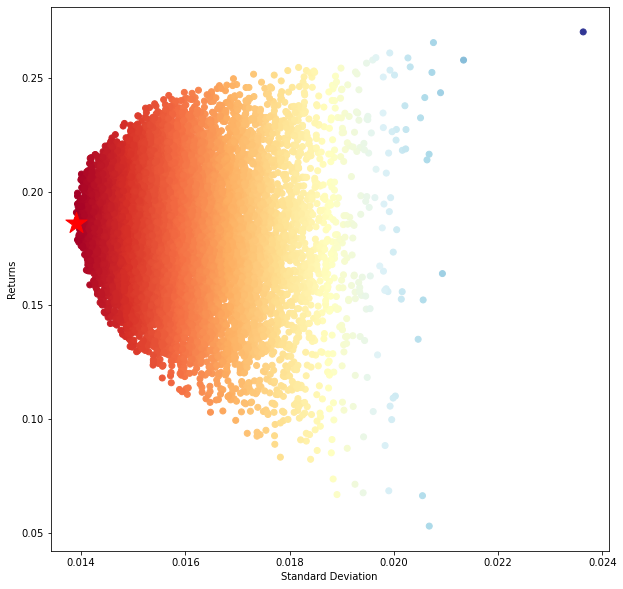

In [10]:
def plot_min_std_port(portfolios, min_std_port):
    plt.subplots(figsize=[10,10])
    plt.scatter(portfolios['Standard_Deviation'], portfolios['Returns'],c=portfolios['Standard_Deviation'],cmap='RdYlBu')
    plt.xlabel('Standard Deviation')
    plt.ylabel('Returns')
    plt.scatter(min_std_port[1], min_std_port[0], color='r', marker='*', s=500)
    plt.show()
    
plot_min_std_port(portfolios, min_std_port)

Mỗi điểm nằm trên biên ngoài đám mây danh mục đầu tư đại diện cho một danh mục tối ưu cho bất kỳ mức rủi ro nhất định nào. Các điểm nằm trong là những danh mục đầu tư không tối ưu. Các điểm nằm bên trong không tối ưu khi cùng một giá trị return nhưng rủi ro lại cao hơn<br>
Trong đám mây trên, ta có thể xác định được danh mục đầu tư có mức biến động thấp nhất (mức rủi ro thấp nhất) là điểm được đánh dấu sao đỏ


Chúng ta có thể thấy danh mục tại điểm có dấu sao đỏ có mức biến động (stantdard deviation) thấp nhất nhưng lợi nhuận của danh mục đầu tư này lại rất thấp. Nhưng bất kỳ nhà đầu tư nào cũng đều muốn tối đa hóa lợi nhuận của mình, ngay cả khi có rủi ro. <br>

### Lựa chọn danh mục tối ưu dựa vào Sharpe ratio

Vì vậy tôi đưa thêm chỉ số Sharpe ratio: là một thước đo xem lợi nhuận thu được là bao nhiêu trên một đơn vị rủi ro khi đầu tư vào một tài sản hay đầu tư theo một chiến lược kinh doanh. <br>
Tỉ lệ Sharpe được phát triển bởi William F. Sharpe và được sử dụng để giúp các nhà đầu tư hiểu được lợi tức của khoản đầu tư so với rủi ro của nó. Tỉ lệ này là lợi nhuận trung bình kiếm được vượt quá lợi nhuận phi rủi ro trên mỗi đơn vị rủi ro. <br>

**Công thức tính:** <br>
<img align="center" src="imags/SharpeRatio.png" alt="Drawing" style="width: 600px;"/>

Một danh mục đầu tư tối ưu có thể được coi là danh mục có Sharpe Ratio cao nhất <br>
<strong><em>(risk free rate là lãi suất phi rủi ro)</em></strong>


In [11]:
risk_free = 0.01 # rủi ro thị trường là 10%
portfolios['Sharpe_ratio'] = ((portfolios['Returns'] - risk_free)/portfolios['Standard_Deviation'])
portfolios

Returns  Standard_Deviation  BVH weight  NVL weight  VCB weight  \
0     0.208359            0.014829    0.082182    0.286406    0.224217   
1     0.207671            0.014340    0.029564    0.318259    0.386123   
2     0.128873            0.015676    0.386919    0.294167    0.206924   
3     0.159183            0.015096    0.198047    0.164088    0.259804   
4     0.186253            0.016638    0.223813    0.124854    0.310263   
...        ...                 ...         ...         ...         ...   
9995  0.115418            0.016281    0.417054    0.181866    0.078685   
9996  0.221428            0.015215    0.022679    0.300128    0.099586   
9997  0.183980            0.014254    0.119427    0.347599    0.095577   
9998  0.174527            0.016337    0.242099    0.154333    0.103803   
9999  0.180792            0.015793    0.189596    0.184580    0.496847   

      FPT weight  SSI weight  Sharpe_ratio  
0       0.188528    0.218667     13.376028  
1       0.214239    0.051816     13.784373  
2       0.099058    0.012932      7.583186  
3       0.376512    0.001549      9.882454  
4       0.098911    0.242160     10.593440  
...          ...         ...           ...  
9995    0.282496    0.039899      6.474940  
9996    0.280558    0.297049     13.896246  
9997    0.317117    0.120279     12.205868  
9998    0.234225    0.265539     10.070578  
9999    0.085871    0.043106     10.814213  

[10000 rows x 8 columns]

In [12]:
# Danh mục đầu tư tối ưu
optimal_port = portfolios.iloc[portfolios['Sharpe_ratio'].idxmax()]    
optimal_port

Returns                0.236751
Standard_Deviation     0.015234
BVH weight             0.002767
NVL weight             0.409312
VCB weight             0.247999
FPT weight             0.049349
SSI weight             0.290573
Sharpe_ratio          14.884392
Name: 8624, dtype: float64

In [13]:
optimal_port['Returns']

0.23675090388254996

In [14]:
import plotly.graph_objects as go

fig = go.Figure()

#min_std_port[1], min_std_port[0]
# Add traces
fig.add_trace(go.Scatter(x=portfolios['Standard_Deviation'], y=portfolios['Returns'],
                    mode='markers',
                    name='Portfolios'))
fig.add_trace(go.Scatter(x=[min_std_port['Standard_Deviation']], y=[min_std_port['Returns']],
                    mode='markers',
                    name='Minimum Standard Deviation', marker=dict(color='Red',size=12)))
fig.add_trace(go.Scatter(x=[optimal_port['Standard_Deviation']], y=[optimal_port['Returns']],
                    mode='markers',
                    name='Maximum Sharpe Ratio', marker=dict(color='LightSkyBlue',size=12)))

fig.update_layout(autosize=False,
                  width=900,
                  height=600)
#                   margin=dict(l=50,r=50,b=100,t=100,pad=4),
#                   paper_bgcolor="LightSteelBlue")

fig.update_layout(title="All Portfolios", 
                  xaxis_title="Standard Deviation", 
                  yaxis_title="Returns") 
#                   legend_title="Legend Title",
#                   font=dict(family="Courier New, monospace",
#                             size=18,
#                             color="RebeccaPurple"))

fig.show()

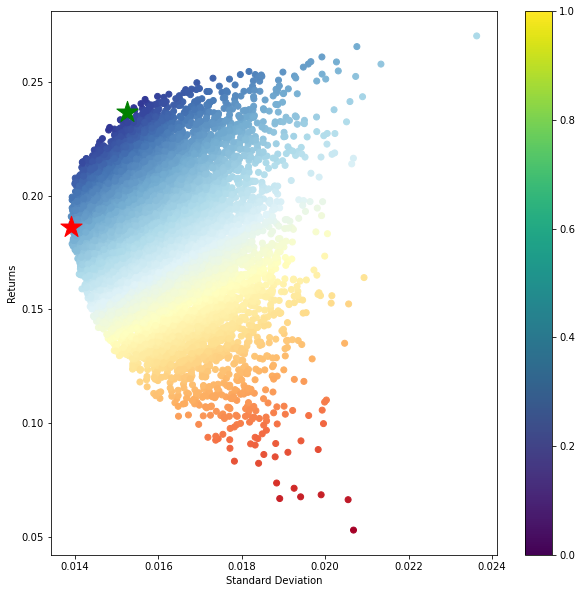

In [15]:
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Standard_Deviation'], portfolios['Returns'],c=portfolios['Sharpe_ratio'],cmap='RdYlBu')
plt.scatter(min_std_port[1], min_std_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_port[1], optimal_port[0], color='g', marker='*', s=500)
plt.xlabel('Standard Deviation')
plt.ylabel('Returns')
plt.colorbar()
plt.show()

Như vậy, danh mục đầu tư tối ưu bằng Sharpe ratio (dấu sao màu xanh) nằm cách khá xa so với danh mục đầu tư có độ lệch chuẩn thấp nhất (dấu sao màu đỏ). <br>
Tuy nhiên, việc lựa chọn danh mục đầu tư như thế nào vẫn phụ thuộc nhiều vào người xây dựng danh mục đầu tư. Phương pháp tối ưu danh mục đầu tư này chỉ mang tính chất tham khảo, không mang tính khuyến khích.

In [21]:
result = pd.concat([min_std_port, optimal_port])
# result = pd.DataFrame(result)
# result.set_index = ['Minimum Satandard Deviation', 'Maximum Shapre Ratio']
result

Returns                0.186332
Standard_Deviation     0.013898
BVH weight             0.083605
NVL weight             0.416294
VCB weight             0.203213
FPT weight             0.279091
SSI weight             0.017797
Returns                0.236751
Standard_Deviation     0.015234
BVH weight             0.002767
NVL weight             0.409312
VCB weight             0.247999
FPT weight             0.049349
SSI weight             0.290573
Sharpe_ratio          14.884392
dtype: float64

In [30]:
result = pd.DataFrame([min_std_port, optimal_port])
result.index = ['Minimum Satandard Deviation', 'Maximum Shapre Ratio']
result = result[['Returns', 'Standard_Deviation', 'Sharpe_ratio', 'BVH weight', 'NVL weight', 'VCB weight', 'FPT weight', 'SSI weight']]
result

Returns  Standard_Deviation  Sharpe_ratio  \
Minimum Satandard Deviation  0.186332            0.013898           NaN   
Maximum Shapre Ratio         0.236751            0.015234     14.884392   

                             BVH weight  NVL weight  VCB weight  FPT weight  \
Minimum Satandard Deviation    0.083605    0.416294    0.203213    0.279091   
Maximum Shapre Ratio           0.002767    0.409312    0.247999    0.049349   

                             SSI weight  
Minimum Satandard Deviation    0.017797  
Maximum Shapre Ratio           0.290573

In [31]:
portfolios

Returns  Standard_Deviation  BVH weight  NVL weight  VCB weight  \
0     0.208359            0.014829    0.082182    0.286406    0.224217   
1     0.207671            0.014340    0.029564    0.318259    0.386123   
2     0.128873            0.015676    0.386919    0.294167    0.206924   
3     0.159183            0.015096    0.198047    0.164088    0.259804   
4     0.186253            0.016638    0.223813    0.124854    0.310263   
...        ...                 ...         ...         ...         ...   
9995  0.115418            0.016281    0.417054    0.181866    0.078685   
9996  0.221428            0.015215    0.022679    0.300128    0.099586   
9997  0.183980            0.014254    0.119427    0.347599    0.095577   
9998  0.174527            0.016337    0.242099    0.154333    0.103803   
9999  0.180792            0.015793    0.189596    0.184580    0.496847   

      FPT weight  SSI weight  Sharpe_ratio  
0       0.188528    0.218667     13.376028  
1       0.214239    0.051816     13.784373  
2       0.099058    0.012932      7.583186  
3       0.376512    0.001549      9.882454  
4       0.098911    0.242160     10.593440  
...          ...         ...           ...  
9995    0.282496    0.039899      6.474940  
9996    0.280558    0.297049     13.896246  
9997    0.317117    0.120279     12.205868  
9998    0.234225    0.265539     10.070578  
9999    0.085871    0.043106     10.814213  

[10000 rows x 8 columns]

In [58]:
min_std = portfolios[portfolios['Standard_Deviation'] == min(portfolios['Standard_Deviation'])]
max_sharpe = portfolios[portfolios['Sharpe_ratio'] == max(portfolios['Sharpe_ratio'])]
result = pd.concat([min_std, max_sharpe])

result.index = ['Minimum Satandard Deviation', 'Maximum Shapre Ratio']
result = result[['Returns', 'Standard_Deviation', 'Sharpe_ratio', 'BVH weight', 'NVL weight', 'VCB weight', 'FPT weight', 'SSI weight']]
result

Returns  Standard_Deviation  Sharpe_ratio  \
Minimum Satandard Deviation  0.186332            0.013898     12.687506   
Maximum Shapre Ratio         0.236751            0.015234     14.884392   

                             BVH weight  NVL weight  VCB weight  FPT weight  \
Minimum Satandard Deviation    0.083605    0.416294    0.203213    0.279091   
Maximum Shapre Ratio           0.002767    0.409312    0.247999    0.049349   

                             SSI weight  
Minimum Satandard Deviation    0.017797  
Maximum Shapre Ratio           0.290573